In [1]:
//%jsroot on

In [2]:
TCanvas *c1=new TCanvas;

In [3]:
Double_t runtime_low[810],runtime_high[810];
Int_t therunnumber;
TGraph *gruntime = new TGraph();
Double_t aaa,lowhour,lowsecond,highhour,highsecond,theday;
ifstream inday("/home/zhuhy/JNBook/Experiment2022/taf/check/txt/16Ntxt/15Cand16N_allall_time_run.txt");
  if(inday.is_open()){
    while(!inday.eof())
    {
      inday>>theday>>therunnumber>>lowhour>>lowsecond>>highhour>>highsecond;
      theday=theday-20221100;
      //cout<<theday<<'\t'<<therunnumber<<'\t'<<lowhour<<'\t'<<lowsecond<<'\t'<<highhour<<'\t'<<lowsecond<<'\n';
      runtime_low[therunnumber] =theday*24+lowhour+lowsecond/60;
      runtime_high[therunnumber]=theday*24+highhour+highsecond/60;
      if(lowhour>highhour)runtime_high[therunnumber]+=24;
      //cout<<"runnumber="<<therunnumber<<'\t'<<"lowtime="<<runtime_low[therunnumber]<<'\t'<<"hightime="<<runtime_high[therunnumber]<<'\t'<<runtime_high[therunnumber]-runtime_low[therunnumber]<<'\n';
      gruntime->SetPoint(therunnumber,therunnumber,runtime_high[therunnumber]-runtime_low[therunnumber]);
      if(therunnumber==809)break;
    }
  }
  inday.close();

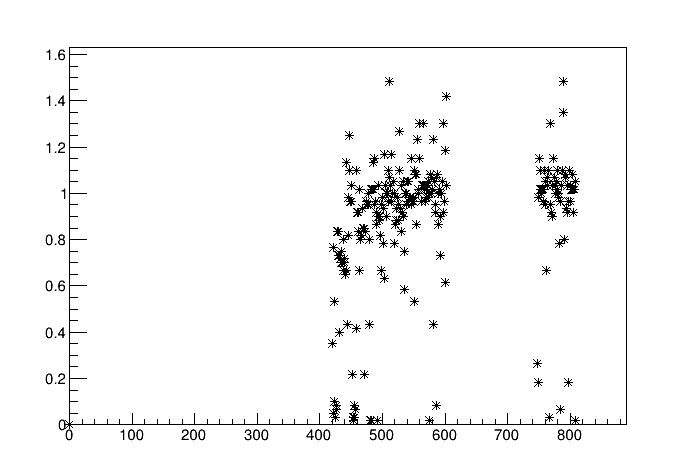

In [4]:
c1->Clear();
gruntime->SetMarkerStyle(3);
gruntime->Draw("ap");
c1->Draw();

In [5]:
  TGraph *gaccpttedrate=new TGraph();
Double_t accpttedrate[810],hhh,temprate;
Int_t countrate=0;
ifstream inr("/home/zhuhy/JNBook/Experiment2022/taf/check/txt/trigger_accepted_rate.txt");
  if(inr.is_open()){
    while(!inr.eof())
    {
      inr>>therunnumber>>hhh>>hhh>>hhh>>hhh>>temprate;
      accpttedrate[therunnumber]=temprate;
      gaccpttedrate->SetPoint(countrate++,therunnumber,accpttedrate[therunnumber]);
      //cout<<therunnumber<<'\t'<<accpttedrate[therunnumber]<<'\n';
    }
  }
  inr.close();

In [6]:
  TGraph *gCrate=new TGraph();
  TGraph *gtarrate=new TGraph();
  Double_t Crate[810],tarrate[810],tempCrate,temptarrate;
  Int_t countrateC=0,countratetar=0;
ifstream inr1("/home/zhuhy/JNBook/Experiment2022/taf/check/txt/16N_all_all_Crate_tarrate.txt");
  if(inr1.is_open()){
    while(!inr1.eof())
    {
      inr1>>therunnumber>>tempCrate>>temptarrate;
      Crate[therunnumber]=tempCrate;
      tarrate[therunnumber]=temptarrate;
      gCrate->SetPoint(countrateC++,therunnumber,Crate[therunnumber]);
      gtarrate->SetPoint(countratetar++,therunnumber,tarrate[therunnumber]);
      //cout<<therunnumber<<'\t'<<rate[therunnumber]<<'\n';
    }
  }
  inr1.close();

In [7]:
  Double_t C15CH2fenchu1=3;
  Double_t key=0;
  Int_t nowfenchu;
  int i;
  TGraph *gt0M=new TGraph();
  TGraph *gt0MB=new TGraph();
  TGraph *gt0S=new TGraph();
  TGraph *gxtaf=new TGraph();
  TGraph *gvtaf=new TGraph();
  TGraph *gt1d1=new TGraph();
  Double_t th;
  Double_t a3,a2,tmp1,tmp2,tmp3,tmp4,tmp5,ttime;
  Double_t t0dMall[810],t0MBall[810],t0sall[810],t0dM,t0MB,t0s;
  Double_t xtafall[810],vtafall[810],t1d1all[810];
  Double_t t0d1M,t0d2M,taf2,taf3,taf4,taf5,vtaf,t1d1,xtaf,t1andt2;
  Double_t t0realall[810],t0realall_M[810];
  for(Int_t ii=0;ii<810;ii++){
      t0dMall[ii]=0;
      t0MBall[ii]=0;
      t0sall[ii]=0;
      t0realall[ii]=0;
  }

  TString fileName;
Int_t thecount=0;
therunnumber=0;
for(Int_t iii=0;iii<=7;iii++){
  fileName = TString::Format("/data/d1/share/pwl/scaler-data/202211%02d.txt",iii+2);
  ifstream in(fileName.Data());
  if(in.is_open()){
    while(!in.eof())
    {
      in>>ttime>>tmp2>>tmp3>>tmp4>>t0s>>t0dM>>t0d1M>>t0d2M>>tmp4>>taf2
        >>taf3>>taf4>>taf5>>vtaf>>tmp5>>tmp1>>t0MB>>t1d1>>xtaf>>tmp5
        >>tmp1>>t1andt2>>tmp3>>tmp4>>tmp5>>tmp1>>a3>>tmp3>>tmp4>>tmp5
        >>tmp1>>tmp2>>tmp3;
        th=ttime/3600.+24.*(iii+2);
        for(Int_t ii=0;ii<184;ii++)if(th>runtime_low[420+ii]&&th<runtime_high[420+ii])therunnumber=420+ii;
        if(th>runtime_high[603])therunnumber=0;
        if(therunnumber==420)nowfenchu=500;
        else if(therunnumber==421)nowfenchu=10;
        else if(therunnumber==422||therunnumber==423)nowfenchu=5;
        else if(therunnumber==424||therunnumber==425)nowfenchu=1;
        else if(therunnumber==426)nowfenchu=5;
        else if(therunnumber==427)nowfenchu=2;
        else if(therunnumber>=428&&therunnumber<=453)nowfenchu=3;
        else if(therunnumber==454)nowfenchu=10;
        else if(therunnumber>=455&&therunnumber<=457)nowfenchu=12;
        else if(therunnumber>=458&&therunnumber<=562)nowfenchu=15;
        else if(therunnumber>=563)nowfenchu=4;
        thecount++;
        
        t0dMall[therunnumber]+=t0dM;
        t0MBall[therunnumber]+=t0MB;
        if(t0s*nowfenchu<100000)t0sall[therunnumber]+=t0s*nowfenchu;
        xtafall[therunnumber]+=xtaf;
        vtafall[therunnumber]+=vtaf;
        t1d1all[therunnumber]+=t1d1;
        if(thecount%100==0&&therunnumber==460)cout<<"t="<<th<<'\t'<<"runnumber="<<therunnumber<<"\t"<<"fenchu= "
            <<nowfenchu<<'\t'<<"t0Sall="<<t0sall[therunnumber]<<'\t'<<"t0dMall="<<t0MBall[therunnumber]
            <<'\t'<<"t0S="<<t0s*nowfenchu<<'\t'<<"t0dM="<<t0MB<<'\n';
    }
  }
  in.close();
}

therunnumber=0;
thecount=0;
for(Int_t iii=0;iii<=3;iii++){
  fileName = TString::Format("/data/d1/share/pwl/scaler-data/202211%02d.txt",iii+14);
  ifstream in(fileName.Data());
  if(in.is_open()){
    while(!in.eof())
    {
      in>>ttime>>tmp2>>tmp3>>tmp4>>t0s>>t0dM>>t0d1M>>t0d2M>>tmp4>>taf2
        >>taf3>>taf4>>taf5>>vtaf>>tmp5>>tmp1>>t0MB>>t1d1>>xtaf>>tmp5
        >>tmp1>>t1andt2>>tmp3>>tmp4>>tmp5>>tmp1>>a3>>tmp3>>tmp4>>tmp5
        >>tmp1>>tmp2>>tmp3;
        th=ttime/3600.+24.*(iii+14);
        for(Int_t ii=0;ii<61;ii++)if(th>runtime_low[748+ii]&&th<runtime_high[748+ii])therunnumber=748+ii;
        nowfenchu=100;
        thecount++;
        t0dMall[therunnumber]+=t0dM;
        t0MBall[therunnumber]+=t0MB;
        t0sall[therunnumber]+=t0s*nowfenchu;
        xtafall[therunnumber]+=xtaf;
        vtafall[therunnumber]+=vtaf;
        t1d1all[therunnumber]+=t1d1;

        //if(therunnumber==752&&therunnumber<=808&thecount%50==0)cout<<"t="<<th<<'\t'<<"runnumber="<<therunnumber<<'\t'<<"t0Sall="<<t0sall[therunnumber]<<'\t'<<"t0S="<<t0s*nowfenchu<<'\n';
    }
  }
  in.close();
}

t=90.055	runnumber=460	fenchu= 15	t0Sall=554610	t0dMall=259701	t0S=31080	t0dM=14803
t=90.0828	runnumber=460	fenchu= 15	t0Sall=3.55584e+06	t0dMall=1.669e+06	t0S=31155	t0dM=14458
t=90.1106	runnumber=460	fenchu= 15	t0Sall=6.59556e+06	t0dMall=3.09624e+06	t0S=31740	t0dM=15241
t=90.1383	runnumber=460	fenchu= 15	t0Sall=9.72609e+06	t0dMall=4.56887e+06	t0S=31905	t0dM=15279
t=90.1661	runnumber=460	fenchu= 15	t0Sall=1.28961e+07	t0dMall=6.05851e+06	t0S=32055	t0dM=15051
t=90.1939	runnumber=460	fenchu= 15	t0Sall=1.6043e+07	t0dMall=7.53259e+06	t0S=30990	t0dM=14642
t=90.2217	runnumber=460	fenchu= 15	t0Sall=1.91636e+07	t0dMall=9.00328e+06	t0S=31125	t0dM=14419
t=90.2494	runnumber=460	fenchu= 15	t0Sall=2.22948e+07	t0dMall=1.04814e+07	t0S=32100	t0dM=15179
t=90.2772	runnumber=460	fenchu= 15	t0Sall=2.51837e+07	t0dMall=1.18463e+07	t0S=31215	t0dM=14773
t=90.305	runnumber=460	fenchu= 15	t0Sall=2.82822e+07	t0dMall=1.32999e+07	t0S=31725	t0dM=14593
t=90.3328	runnumber=460	fenchu= 15	t0Sall=3.13998e+07	t0dMall=1.4

In [8]:
  TGraph *gMBtoM=new TGraph();
  Int_t count=0;
  Int_t countt0S=0;
  Double_t t0dMallall1,t0MBallall1;
  Double_t t0dMallall2,t0MBallall2;

  for(Int_t ii=420;ii<=603;ii++){
    //if((runtime_high[ii]-runtime_low[ii])<0.25){cout<<ii<<'\t'<<"too small run to count!"<<'\n';continue;}
    //cout<<ii<<'\t'<<runtime_high[ii]-runtime_low[ii]<<'\t'<<t0sall[ii]<<'\n';
    gt0S->SetPoint(countt0S++,ii,t0sall[ii]);
    gMBtoM->SetPoint(count++,ii,(Double_t)(t0MBall[ii])/(Double_t)(t0dMall[ii]));
    t0dMallall1+=t0dMall[ii];
    t0MBallall1+=t0MBall[ii];
    //cout<<ii<<'\t'<<t0sall[ii]<<'\t'<<t0dMall[ii]<<'\t'<<t0MBall[ii]<<'\t'<<(Double_t)(t0MBall[ii])/(Double_t)(t0dMall[ii])<<'\n';
  }

  for(Int_t ii=748;ii<809;ii++){
    //if((runtime_high[ii]-runtime_low[ii])<0.25){cout<<ii<<'\t'<<"too small run to count!"<<'\n';continue;}
    //cout<<ii<<'\t'<<runtime_high[ii]-runtime_low[ii]<<'\t'<<t0sall[ii]<<'\n';
    gt0S->SetPoint(countt0S++,ii,t0sall[ii]);
    //cout<<ii<<'\t'<<t0sall[ii]<<'\n';
    gMBtoM->SetPoint(count++,ii,(Double_t)(t0MBall[ii])/(Double_t)(t0dMall[ii]));
    t0dMallall2+=t0dMall[ii];
    t0MBallall2+=t0MBall[ii];
    //cout<<ii<<'\t'<<t0sall[ii]<<'\t'<<t0dMall[ii]<<'\t'<<t0MBall[ii]<<'\t'<<(Double_t)(t0MBall[ii])/(Double_t)(t0dMall[ii])<<'\n';
  }


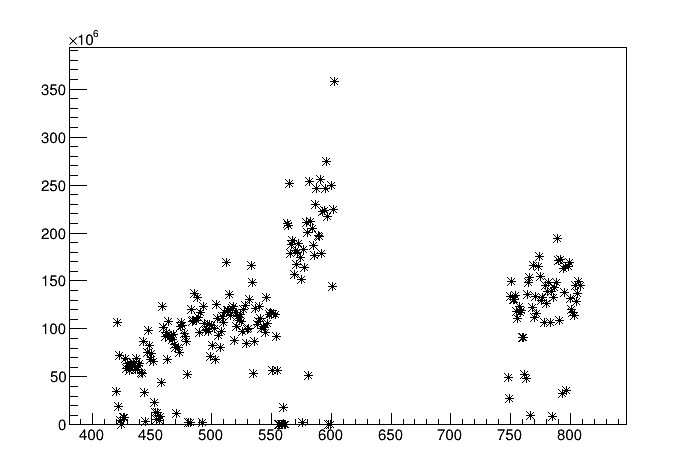

In [9]:
c1->Clear();
gt0S->SetMarkerStyle(3);
gt0S->Draw("ap");
c1->Draw();

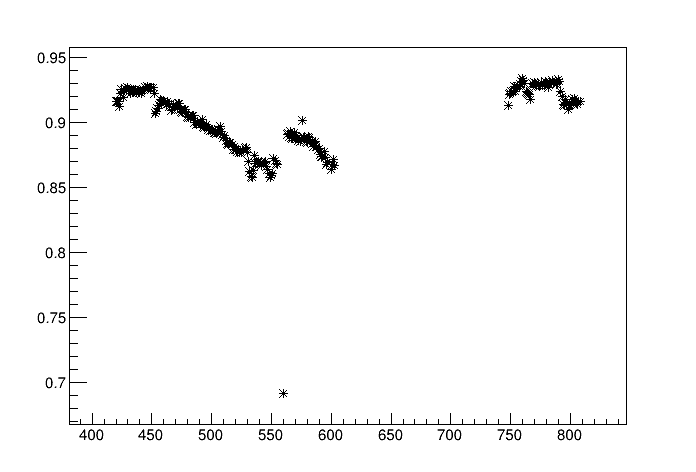

run 420~452 ave t0MB/t0dM = 0.887901
run 799~809 ave t0MB/t0dM = 0.924655


In [10]:
c1->Clear();
gMBtoM->SetMarkerStyle(3);
gMBtoM->Draw("ap");
c1->Draw();
cout<<"run 420~452 ave t0MB/t0dM = "<<t0MBallall1/t0dMallall1<<'\n';
cout<<"run 799~809 ave t0MB/t0dM = "<<t0MBallall2/t0dMallall2<<'\n';

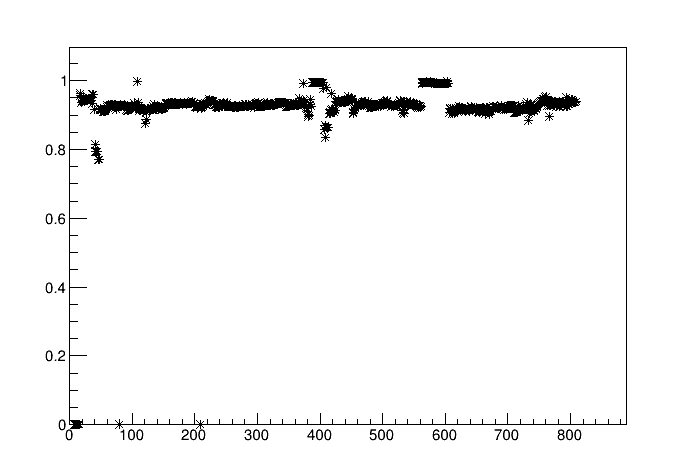

In [11]:
c1->Clear();
gaccpttedrate->SetMarkerStyle(3);
gaccpttedrate->Draw("ap");
c1->Draw();

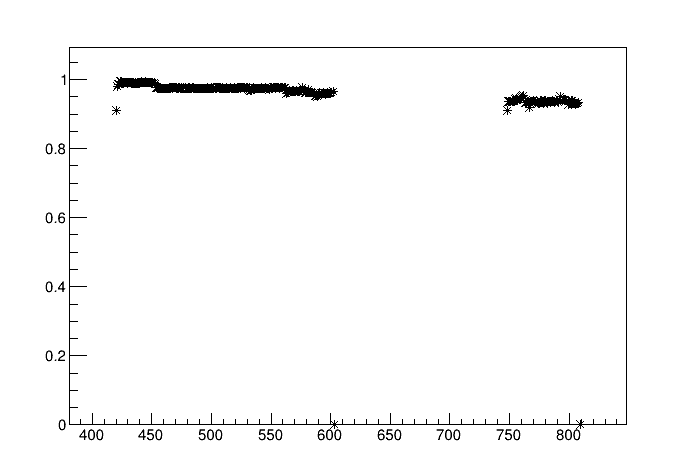

In [12]:
c1->Clear();
gCrate->SetMarkerStyle(3);
gCrate->Draw("ap");
c1->Draw();

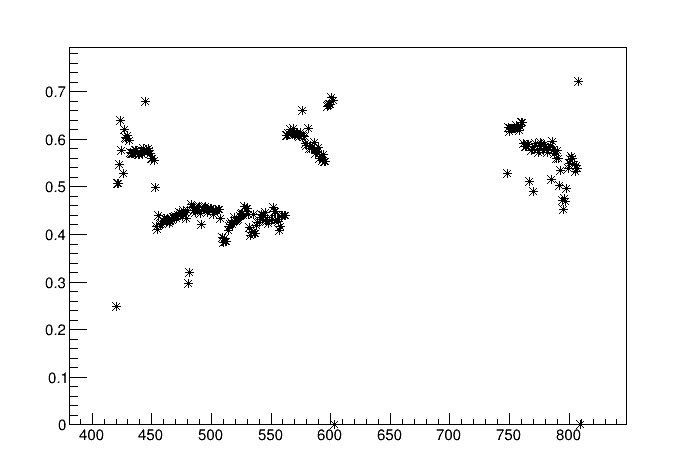

In [13]:
c1->Clear();
gtarrate->SetMarkerStyle(3);
gtarrate->Draw("ap");
c1->Draw();

In [14]:
  TGraph *gt0realall=new TGraph();
  TGraph *grate_d_to_s=new TGraph();
Int_t coungtrate_d_to_s=0;
Int_t countrealall=0;
long C15CH2all1=0,C15CH2all2=0;
long C15CD2all1=0,C15CD2all1_0=0,C15CD2all1_1=0,C15CD2all2=0;
long C15Call1=0,C15Call2=0;
long C15notarall1=0,C15notarall2=0;
long N16CH2all=0;
long N16CD2all=0;
long N16Call=0;
long N16notarall=0;

long N16CD2all_M=0;
long C15CD2all1_M=0,C15CD2all1_0_M=0,C15CD2all1_1_M=0;
long C15Call1_M=0;

  for(Int_t ii=0;ii<809;ii++){
      if(ii==480||ii==491)continue;
      //*accpttedrate[ii]
      t0realall[ii]=accpttedrate[ii]*t0sall[ii]* Crate[ii]*tarrate[ii]*(Double_t)(t0MBall[ii])/((Double_t)(t0dMall[ii])*0.95);
    t0realall_M[ii]=accpttedrate[ii]*t0MBall[ii]*Crate[ii]*tarrate[ii]/0.95;
      if((ii>=420&&ii<=603)||(ii>=748&&ii<=808)){
          if(t0dMall[ii]/t0sall[ii]<1)grate_d_to_s->SetPoint(coungtrate_d_to_s++,ii,t0dMall[ii]/t0sall[ii]);
          //cout<<"run number= "<<ii<<'\t'<<"rate= "<<t0dMall[ii]/t0sall[ii]<<'\t'<<t0dMall[ii]<<'\t'<<t0sall[ii]<<'\n';
      }
      //if((ii>=420&&ii<=603)||(ii>=748&&ii<=808))cout<<ii<<'\t'<<t0realall[ii]<<'\t'<<t0sall[ii]<<'\t'<<Crate[ii]<<'\t'<<tarrate[ii]<<'\t'<<accpttedrate[ii]<<'\t'<<(Double_t)(t0MBall[ii])/(Double_t)(t0dMall[ii])<<'\n';
      if((ii>=420&&ii<=603)||(ii>=748&&ii<=808))gt0realall->SetPoint(countrealall++,ii,t0realall[ii]);
      if(ii>=420&&ii<=452)C15CH2all1+=t0realall[ii];
      if(ii>=453&&ii<=530)C15CD2all1+=t0realall[ii];
      if(ii>=453&&ii<=492)C15CD2all1_0+=t0realall[ii];
      if(ii>=493&&ii<=530)C15CD2all1_1+=t0realall[ii];
      if(ii>=531&&ii<=551)C15Call1+=t0realall[ii];
      if(ii>=552&&ii<=555)C15notarall1+=t0realall[ii];
      if(ii>=748&&ii<=789&&ii!=766)C15CD2all2+=t0realall[ii];
      if(ii>=790&&ii<=791)C15notarall2+=t0realall[ii];
      if(ii==792||ii==798)C15Call2+=t0realall[ii];
      if(ii>=799&&ii<=808)C15CH2all2+=t0realall[ii];
      
      
      if(ii>=563&&ii<=586)N16CD2all+=t0realall[ii];
      if(ii>=587&&ii<=590)N16Call+=t0realall[ii];
      if(ii>=591&&ii<=601&&ii!=598&&ii!=599)N16CH2all+=t0realall[ii];
      if(ii>=602&&ii<=603)N16notarall+=t0realall[ii];
      
    
      if(ii>=453&&ii<=530)C15CD2all1_M+=t0realall_M[ii];
      if(ii>=453&&ii<=492)C15CD2all1_0_M+=t0realall_M[ii];
      if(ii>=493&&ii<=530)C15CD2all1_1_M+=t0realall_M[ii];   
      if(ii>=531&&ii<=551)C15Call1_M+=t0realall_M[ii];   

  }

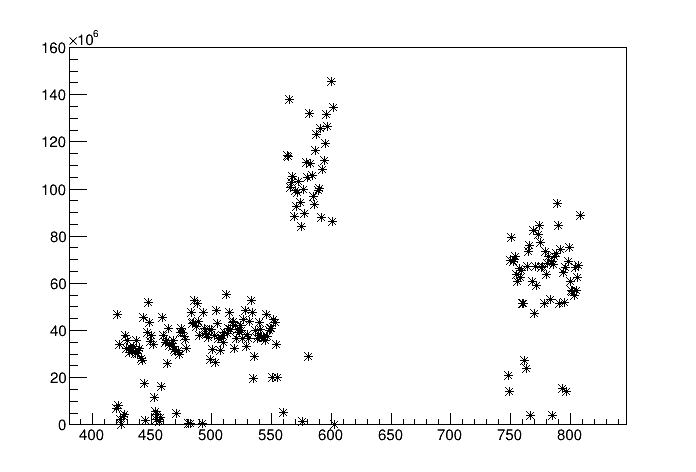

*******CD2 双举**********
1278129377	562024962	716104415
*******C 双举**********
397004004
*******CD2**********
2605273136	1107434523	1497838613
2465745984
5071019120
*******CH2**********
906760843
647551017
1554311860
*******C**********
800650612
143590001
1448201629
*******notar**********
142167942
136309276
278477218
*******N16 CD2**********
2308484346
*******N16 CH2**********
1043709332
*******N16 C**********
438779627
*******N16 notar**********
134737943


In [15]:
c1->Clear();
gt0realall->SetMarkerStyle(3);
gt0realall->Draw("ap");
c1->Draw();
cout<<"*******CD2 双举**********"<<'\n';
cout<<C15CD2all1_M<<'\t'<<C15CD2all1_0_M<<'\t'<<C15CD2all1_1_M<<'\n';
cout<<"*******C 双举**********"<<'\n';
cout<<C15Call1_M<<'\n';
cout<<"*******CD2**********"<<'\n';
cout<<C15CD2all1<<'\t'<<C15CD2all1_0<<'\t'<<C15CD2all1_1<<'\n';
cout<<C15CD2all2<<'\n';
cout<<C15CD2all1+C15CD2all2<<'\n';
cout<<"*******CH2**********"<<'\n';
cout<<C15CH2all1<<'\n';
cout<<C15CH2all2<<'\n';
cout<<C15CH2all1+C15CH2all2<<'\n';
cout<<"*******C**********"<<'\n';
cout<<C15Call1<<'\n';
cout<<C15Call2<<'\n';
cout<<C15Call1+C15CH2all2<<'\n';
cout<<"*******notar**********"<<'\n';
cout<<C15notarall1<<'\n';
cout<<C15notarall2<<'\n';
cout<<C15notarall1+C15notarall2<<'\n';

cout<<"*******N16 CD2**********"<<'\n';
cout<<N16CD2all<<'\n';
cout<<"*******N16 CH2**********"<<'\n';
cout<<N16CH2all<<'\n';
cout<<"*******N16 C**********"<<'\n';
cout<<N16Call<<'\n';
cout<<"*******N16 notar**********"<<'\n';
cout<<N16notarall<<'\n';

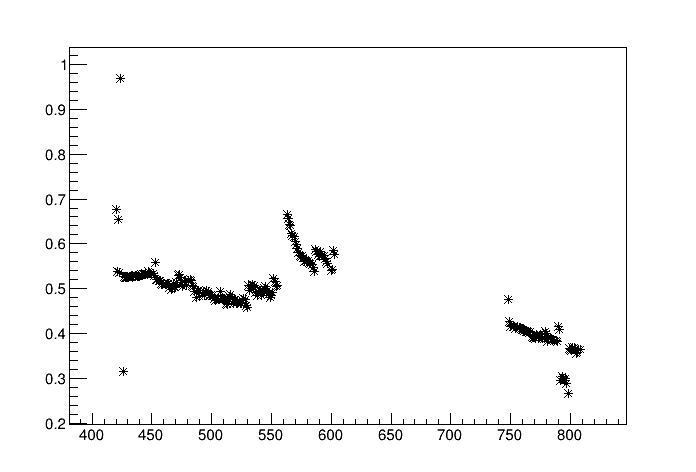

In [16]:
c1->Clear();
grate_d_to_s->SetMarkerStyle(3);
grate_d_to_s->Draw("ap");
c1->Draw();

In [17]:
/*
        ofstream write1;
        TString outfileName = TString::Format("/home/zhuhy/JNBook/Experiment2022/taf/check/txt/15C_CH2_tafandt1.txt");
        write1.open(outfileName.Data(), ios::out);
        for(Int_t i=420; i<=452; i++)write1<< i<< "\t" <<setprecision(10)<<xtafall[i]<<"\t" <<setprecision(10)<<vtafall[i]<<'\t'<<setprecision(10)<<t1d1all[i]<<endl;
        for(Int_t i=799; i<=809; i++)write1<< i<< "\t" <<setprecision(10)<<xtafall[i]<<"\t" <<setprecision(10)<<vtafall[i]<<'\t'<<setprecision(10)<<t1d1all[i]<<endl;
        write1.close();
*/